# <div style = 'background-color:red'> <center> Youtube Analysis </div>

<center>
<img src="https://fdn.gsmarena.com/imgroot/news/23/02/youtube-testing-1080p-premium/-1200/gsmarena_000.jpg" width=500>
</center>

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading DF
comments= pd.read_csv('/kaggle/input/youtube/UScomments.csv',on_bad_lines = "skip")

/tmp/ipykernel_18/3977046787.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments= pd.read_csv('/kaggle/input/youtube/UScomments.csv',on_bad_lines = "skip")


In [3]:
comments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [4]:
## lets find out missing values in your data
comments.isna().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
## drop missing values as we have very few & update datafraem as well..
comments.dropna(inplace=True)

In [6]:
# cheking if there is any left missing values 
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Perform Sentiment Analysis

In [7]:
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [8]:
from textblob import TextBlob

In [9]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [10]:
# taking a simple of our data 
df=comments[0:1000]

In [11]:
#append our polarity columns to df
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [13]:
comments.shape

(691374, 4)

In [14]:
comments.head(3)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0


In [15]:
#adding polarity columns to our df
comments['polarity']=polarity

In [16]:
comments.head(12)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# 2. Wordcloud Analysis 


In [17]:
### Lets perform EDA for the Positve and negative sentences
comments_positive=comments[comments['polarity']==1]
comments_negative=comments[comments['polarity']==-1]
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0


In [18]:
# installing wordcloud 
!pip install wordcloud

In [19]:
from wordcloud import WordCloud , STOPWORDS

In [20]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [21]:
# joining negative comment to implemant wordcloud analysis
total_comments=' '.join(comments_negative['comment_text'])

In [22]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

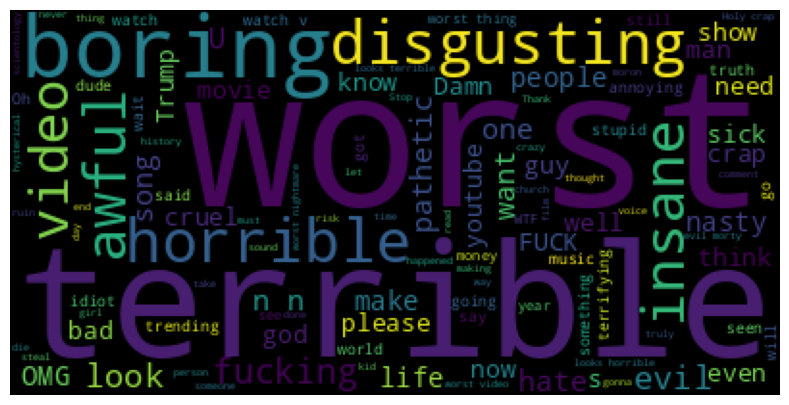

In [23]:
# ploting the data 
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [24]:
### Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

In [25]:
### Lets perform EDA for the Positive sentences
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

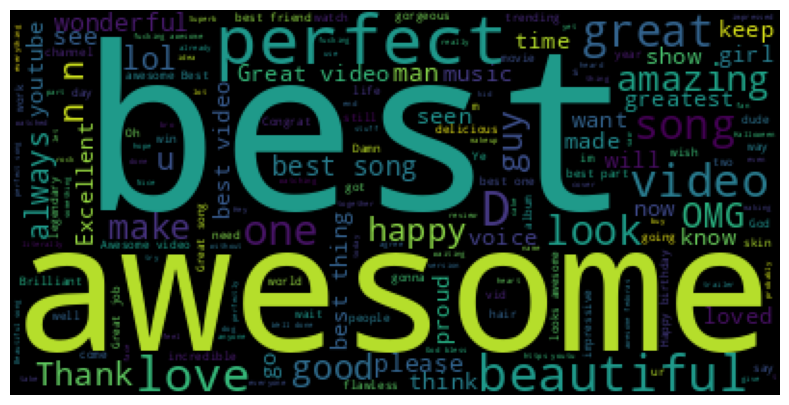

In [26]:
#ploting the data 
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [27]:
### Users are emphasizing more on awesome , best ,perfect ,beautiful , best video etc..

# 3..Collect Entire data of Youtube !

In [28]:
import os
from os import listdir 

In [29]:
#Listing the files in youtube folders 
path = '/kaggle/input/youtube-new'
files = os.listdir(path)
files

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'MX_category_id.json',
 'GB_category_id.json',
 'US_category_id.json',
 'IN_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'RU_category_id.json',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'JP_category_id.json',
 'JPvideos.csv',
 'FR_category_id.json',
 'CAvideos.csv']

In [30]:
# create a function to extract all csv files in the folder
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [31]:
files_csv = []
filenames = find_csv_filenames("/kaggle/input/youtube-new")
for name in filenames:
  files_csv.append(name)
print(files_csv)

['GBvideos.csv', 'MXvideos.csv', 'KRvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'USvideos.csv', 'INvideos.csv', 'RUvideos.csv', 'JPvideos.csv', 'CAvideos.csv']


In [32]:
# reading this files to a full df 
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',on_bad_lines = "skip")
    
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

In [33]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [34]:
full_df.shape

(375942, 17)

# 4.. Which Category has the maximum likes ?

In [35]:
full_df['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43, 44,
       30])

In [36]:
# reading the category file 

cat=pd.read_csv('/kaggle/input/category-file/category_file.txt',sep=':')

In [37]:
# set the columns name and index for category file
cat.reset_index(inplace=True)
cat.columns=['category_id','Category_name']
cat.set_index('category_id',inplace=True)
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [38]:
# transform category file to a dictionary
dct=cat.to_dict()
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [39]:
# mapping the category file to our full df
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])
# now we have category columns we do analysis
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,Music


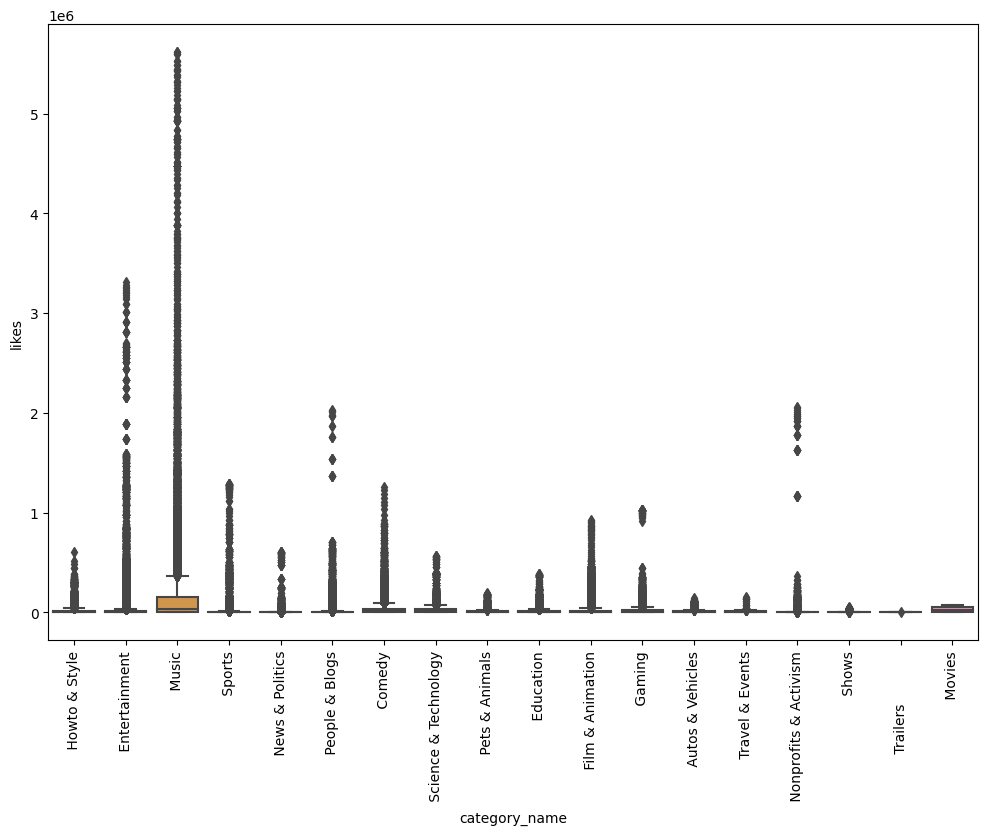

In [40]:
#ploting the relationsship betwwen likes and category
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# We see that category like Music and entertainement are getting more likes camparison to other category

# 5.. Find out whether audience is engaged or not

In [42]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [43]:
# Creating new columns for the % of likes , dislike, comment 
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [44]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,Howto & Style,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,Entertainment,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,Music,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,Sports,0.693421,0.043114,0.132936
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,...,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB,News & Politics,0.305655,0.020377,0.305655


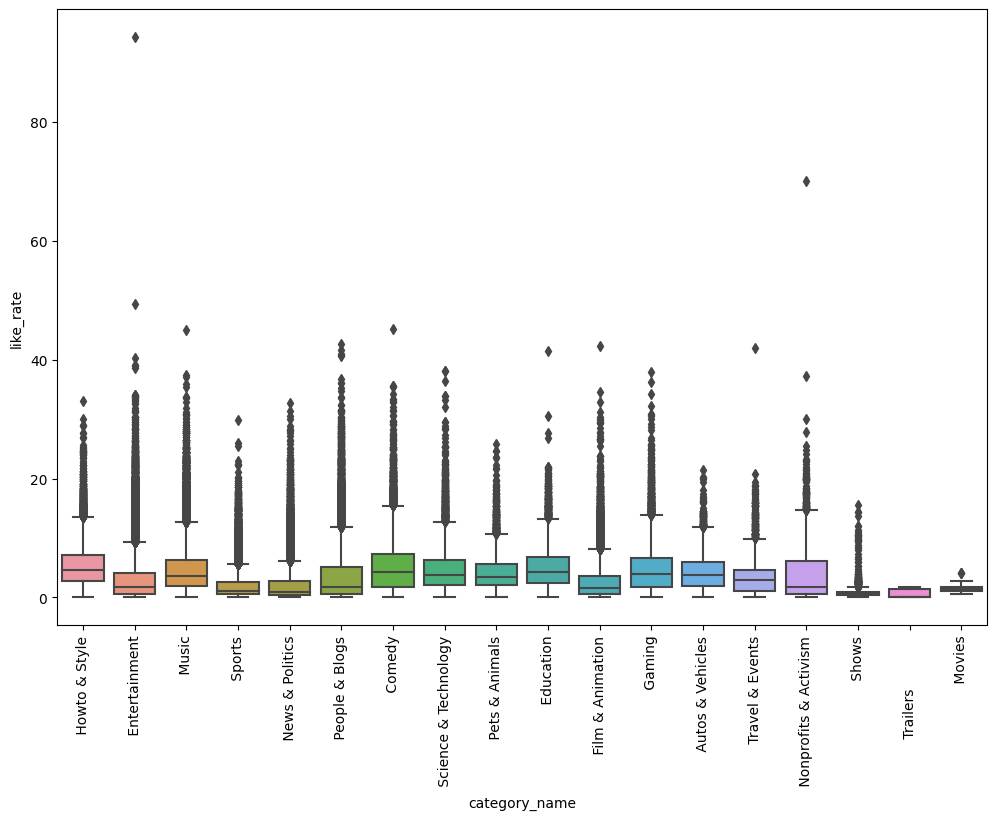

In [45]:
#ploting th relationsship betwwen category and likes_rate
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

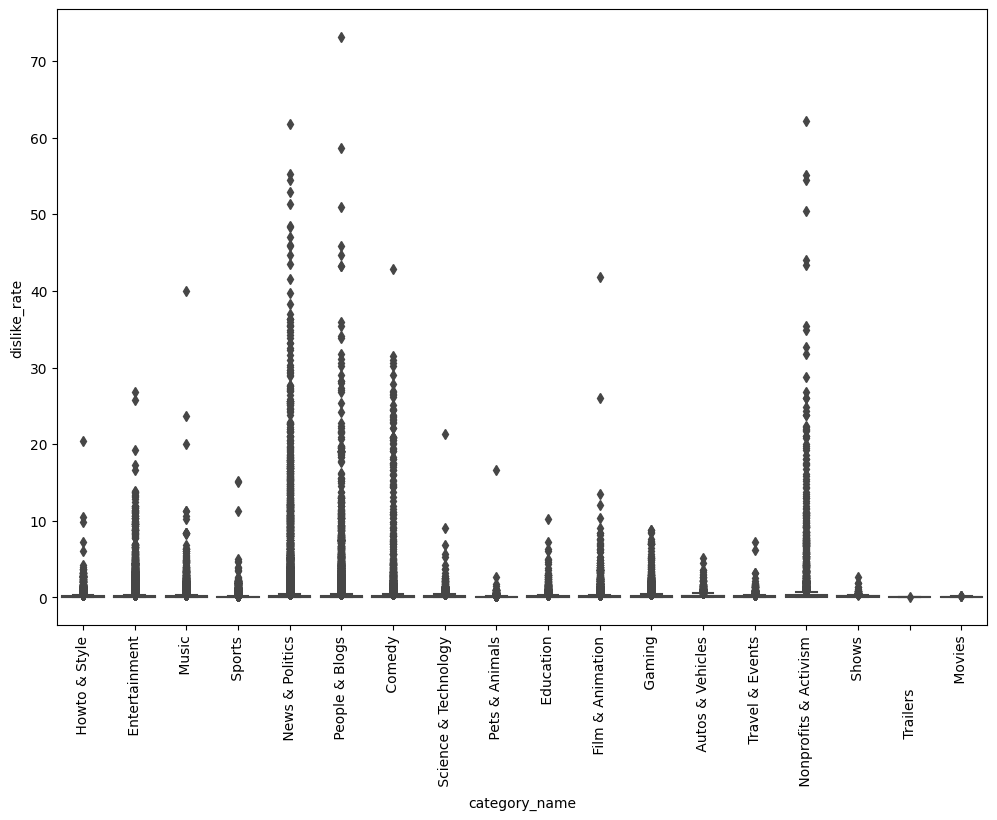

In [46]:
#ploting the relationsship betwwen category and dislike_rate
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='dislike_rate',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
# we see that category like News&Politics and People & Blogs , Nonprofits & Activism are getting more dislikes 

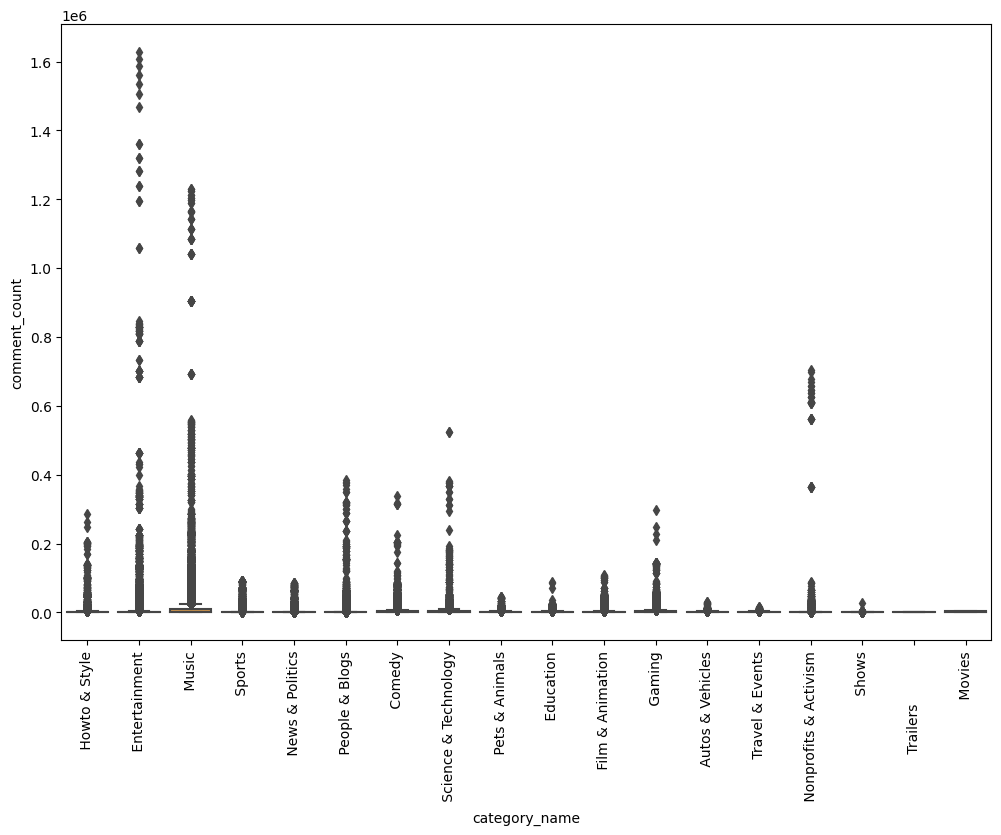

In [48]:
#ploting the relationsship betwwen category and comment count 
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='comment_count',data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Entertainment and music category getting more comments comparison to other category

<Axes: xlabel='views', ylabel='likes'>

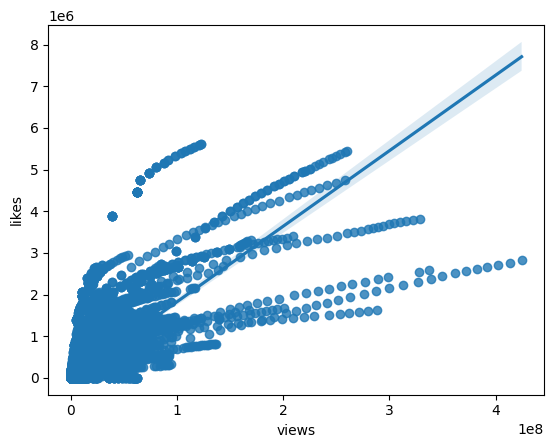

In [50]:
### analysing relationship between views & likes
sns.regplot(data=full_df,x='views',y='likes')

<Axes: >

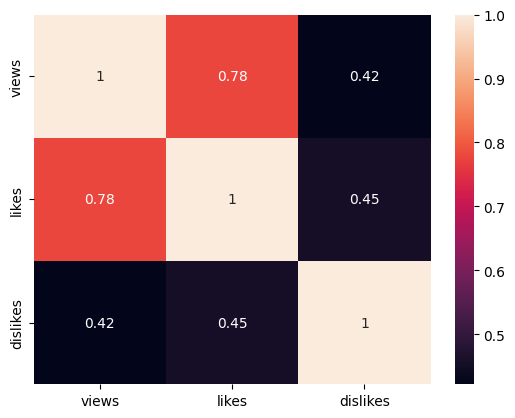

In [51]:
### finding co-relation values between ['views', 'likes', 'dislikes']
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

# 6..Which channels have the largest number of trending videos?

In [52]:
# getting the count of videos by channel 
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [53]:
# ploting top 20 Channel by the number of videos
import plotly.express as px
px.bar(data_frame=cdf[0:20],x='channel_title',y='total_videos',color = 'total_videos', 
       template = 'plotly_white',color_continuous_scale = px.colors.sequential.Inferno)

# 7..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
# Create a function that count the total of punct in a titel 
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [56]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)

4

In [57]:
# take a simple of our full df and applying the punct function to it 
sample=full_df[0:10000]
sample['count_punc']=sample['title'].apply(punc_count)

/tmp/ipykernel_18/317688007.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,False,False,Click here to continue the story and make your...,GB,Howto & Style,0.770723,0.141837,0.131206,2
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,Entertainment,2.425989,0.217723,0.261666,5
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,Music,4.589075,0.253051,0.733639,4
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,Sports,0.693421,0.043114,0.132936,1
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,...,False,False,False,Dashcam captures truck's near miss with child ...,GB,News & Politics,0.305655,0.020377,0.305655,1


<Axes: xlabel='count_punc', ylabel='views'>

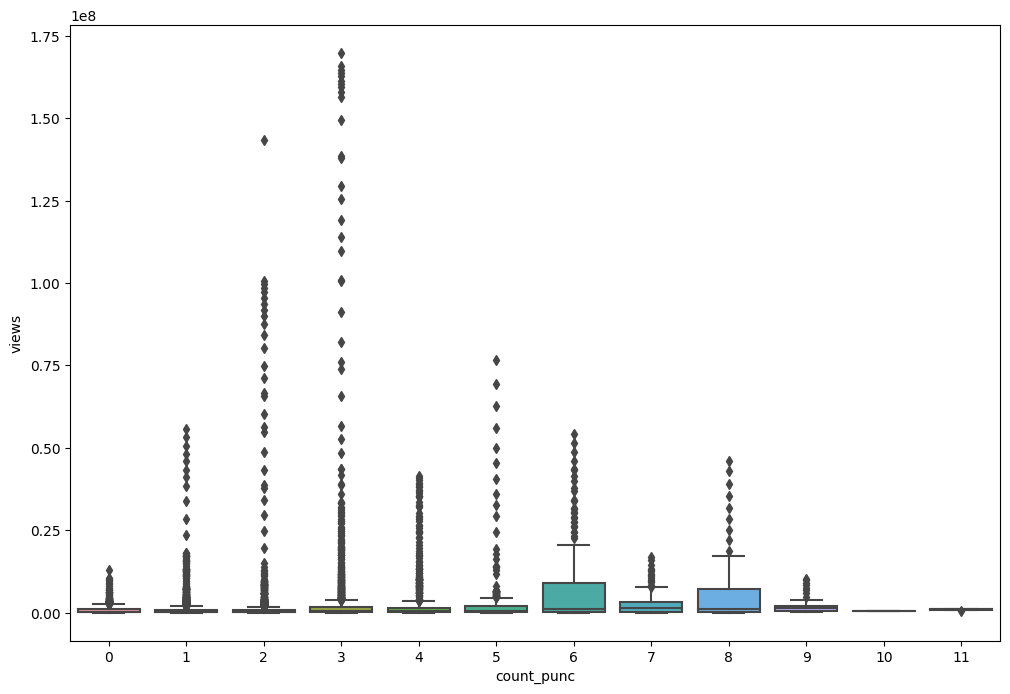

In [59]:
#ploting the relation betwwen number of punct in titel with views 
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [60]:
# we see that titel that contains 2 and 3 Punctuations gtting more views 

In [61]:
# the correlation between Punctuations and views
sample['count_punc'].corr(sample['views'])

0.10377870711371782

# <div style = 'background-color:red'> <center> The End </div>